In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='ticks')
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.insert(0, '../../induction_analysis')

import Analysis.induction_analysis as ia
import Analysis.induction_plots as ip
from Analysis import filters
from Analysis import comparison_plots as cp

from lab_repo.classes.place_cell_classes import pcExperimentGroup

from Experiments import SingleCellExperiment

import pandas as pd
import numpy as np

from scipy.stats import ttest_ind, spearmanr, mann_whitneyu, sem

/home/sebi/code/analysis/analysis-scripts/induction_analysis/Analysis/induction_analysis.py:4: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/sebi/.local/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/sebi/.local/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/sebi/.local/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 499, in start
    self.io_loop.

In [2]:
# Initialize Groups
grps = []

pc_kwargs = {'imaging_label': 's2p',
             'nPositionBins': 100,
             'channel': 'Ch2',
             'demixed': False,
             'pf_subset': None,
             'signal': 'spikes'}

# First, control
expt_ids = [22286, 22311, 22417, 24600, 24640, 24659, 24694, 24603, 24677, 24773, 24688, 24781]

mps = ['/data/Mohsin/2p/msa0919_2/10_10_19/MarkPoints-10102019-induce-002',
       '/data/Mohsin/2p/msa0919_2/10_5_19/MarkPoints-10052019-induce-002',
       '/data/Mohsin/2p/msa0919_1/10_18_19/MarkPoints-10182019-induce-001',
       '/data4/Mohsin/2p/msa0220_3/2_24_20/MarkPoints-02242020-induce-003',
       '/data4/Mohsin/2p/msa0220_3/2_28_20/MarkPoints-02282020-induce-003',
       '/data4/Mohsin/2p/msa0220_3/3_4_20/MarkPoints-02282020-induce-003',
       '/data4/Mohsin/2p/msa0220_3/3_8_20/MarkPoints-03082020-induce-003',
       '/data4/Mohsin/2p/msa0220_4/2_24_20/MarkPoints-02242020-induce-003',
       '/data4/Mohsin/2p/msa0320_1/3_6_20/MarkPoints-02282020-induce-003',
       '/data4/Mohsin/2p/msa0320_1/3_10_20/MarkPoints-03102020-induce-003',
       '/data4/Mohsin/2p/msa0320_2/3_9_20/MarkPoints-03092020-induce-003',
       '/data4/Mohsin/2p/msa0320_2/3_11_20/MarkPoints-03082020-induce-003']

expts = [SingleCellExperiment.SingleCellExperiment(x, mp) for x, mp in zip(expt_ids, mps)]
grp = pcExperimentGroup(expts, label='dense_all', **pc_kwargs)
grps.append(grp)

# Next, CNO
expt_ids = [22326, 22318, 22432, 24609, 24656, 24676, 24777, 24691, 24792, 24765, 24798]

mps = ['/data/Mohsin/2p/msa0919_2/10_10_19/MarkPoints-10102019-induce-002',
       '/data/Mohsin/2p/msa0919_2/10_7_19/MarkPoints-10072019-CNO_test-006',
       '/data/Mohsin/2p/msa0919_1/10_20_19/MarkPoints-10202019-induce-001',
       '/data4/Mohsin/2p/msa0220_3/2_26_20/MarkPoints-02262020-induce-003',
       '/data4/Mohsin/2p/msa0220_3/3_1_20/MarkPoints-02282020-test-002',
       '/data4/Mohsin/2p/msa0220_3/3_6_20/MarkPoints-02282020-induce-003',
       '/data4/Mohsin/2p/msa0220_3/3_10_20/MarkPoints-03102020-induce-003',
       '/data4/Mohsin/2p/msa0320_1/3_8_20/MarkPoints-03082020-induce-003',
       '/data4/Mohsin/2p/msa0320_1/3_12_20/MarkPoints-03082020-induce-003',
       '/data4/Mohsin/2p/msa0320_2/3_9_20/MarkPoints-03092020-induce-003',
       '/data4/Mohsin/2p/msa0320_2/3_13_20/MarkPoints-03082020-induce-003']

expts = [SingleCellExperiment.SingleCellExperiment(x, mp) for x, mp in zip(expt_ids, mps)]
grp = pcExperimentGroup(expts, label='cno_dense_all', **pc_kwargs)
grps.append(grp)

labels = ['Dense', '+Dreadd']
colors = ['warm blue', 'golden rod']
colors = sns.xkcd_palette(colors)

# Setup Filters
stim_filters = []
ind_filters = []
nostim_filters = []
nostim_ind_filters = []
filter_overwrite = False


for grp in grps:
    stim_filter = filters.grp_stim_filter(grp, spatial_dist=75, label='s2p', overwrite=filter_overwrite, activity_filter=True)
    ind_filter = filters.grp_induction_filter(grp, stim_filter=stim_filter, overwrite=filter_overwrite)
    nostim_filter = filters.grp_unstimmed_filter(grp, exclude_baseline_stim=True, overwrite=filter_overwrite)
    nostim_ind_filter = filters.grp_unstimmed_formation_filter(grp, stim_filter=nostim_filter, overwrite=filter_overwrite)

    stim_filters.append(stim_filter)
    ind_filters.append(ind_filter)
    nostim_filters.append(nostim_filter)
    nostim_ind_filters.append(nostim_ind_filter)

filtered_grps = []
for grp, stim_filter in zip(grps, stim_filters):
    expts = [expt for expt in grp if len(expt.rois(roi_filter=stim_filter))]
    grp = pcExperimentGroup(expts, label=grp.label(), **grp.args)
    filtered_grps.append(grp)
grps = filtered_grps

In [ ]:
# Note: Need to exclude msa0919_1 expt_id: 22417 because it failed to stimulate multiple cells

## Plots

In [96]:
for expt in grps[1]:
    print expt.trial_id, expt.parent.mouse_name

22326 msa0919_2
22318 msa0919_2
24609 msa0220_3
24656 msa0220_3
24676 msa0220_3
24777 msa0220_3
24691 msa0320_1
24792 msa0320_1
24765 msa0320_2
24798 msa0320_2


In [16]:
# Setup
from matplotlib import rc
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['ytick.labelsize'] = 6
plt.rcParams['xtick.labelsize'] = 6
plt.rcParams['axes.labelsize'] = 7
plt.rcParams['boxplot.boxprops.linewidth'] = 1
plt.rcParams['axes.unicode_minus'] = False

rc('font',**{'family':'sans-serif','sans-serif':['helvetica', 'sans-serif']})

def clean(ax, full=False, offset=0):
    if full:
        sns.despine(ax=ax, left=True, bottom=True, offset=offset)
        ax.set_yticks([])
        ax.set_xticks([])
    else:
        sns.despine(ax=ax, offset=offset)
        
labels = ['Dense', '+Dreadd']
colors = ['warm blue', 'golden rod']
colors = sns.xkcd_palette(colors)

### Activity Centroids

SpearmanrResult(correlation=-0.38298049251844074, pvalue=0.27467301434339914)
SpearmanrResult(correlation=0.7500139429824981, pvalue=0.012475320838889697)


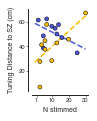

In [32]:
fig = plt.figure(figsize=(1, 1.5))
ax = fig.add_subplot(111)

activity_centroid_df = activity_centroid_df.reset_index()
activity_centroid_df = activity_centroid_df.loc[activity_centroid_df['expt_id'] != 22417] #Exclude expt with single stimulated cell

sns.scatterplot(y='abs_dist', x='count', hue='group', palette=colors,
                data=activity_centroid_df, linewidth=0.5, edgecolor='k', s=16, ax=ax)
clean(ax, offset=4)

ax.get_legend().remove()
ax.set_xlabel('N stimmed')
ax.set_xticks([1, 10, 20, 30])
ax.set_ylabel('Tuning Distance to SZ (cm)')

# Plot trendlines

max_count = activity_centroid_df['count'].max()

i = 1
for _, sub_df in activity_centroid_df.groupby('group'):

    pfit = np.polyfit(x=sub_df['count'].values[:], y=sub_df['abs_dist'].values[:], deg=1)
    x = np.linspace(0, max_count, 3)
    y = x * pfit[0] + pfit[1]
    
    ax.plot(x, y, color=colors[i], zorder=0, ls='--')
    i-=1

fig.savefig(savedir + 'activity_centroid_vs_pct_dense.svg')

dense_df = activity_centroid_df.loc[activity_centroid_df['group'] == 'dense_all']
cno_df = activity_centroid_df.loc[activity_centroid_df['group'] == 'cno_dense_all']

print spearmanr(dense_df['abs_dist'], dense_df['count'])
print spearmanr(cno_df['abs_dist'], cno_df['count'])

### Shifts

1.61079466557 4.147369702709742
17.9075964395 5.687620692006236
0.03261061888324828


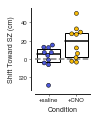

In [38]:
fig = plt.figure(figsize=(1, 1.5))
ax = fig.add_subplot(111)

# shift_df = shift_df.reset_index()
shift_df = shift_df.loc[shift_df['expt_id_ind'] != 22417]

sns.boxplot(x='condition', y='shift', data=shift_df,
            ax=ax, order=['Dense', '+Dreadd'],
            whis=False, showcaps=False, showfliers=False)
plt.setp(ax.artists, edgecolor='k', facecolor='w', linewidth=1)
plt.setp(ax.lines, color='k')

sns.swarmplot(x='condition', y='shift', hue='condition', data=shift_df, palette=colors,
              order=['Dense', '+Dreadd'], hue_order=['Dense', '+Dreadd'], ax=ax, size=4,
              edgecolor='k', linewidth=0.5, alpha=1)

ax.get_legend().remove()

clean(ax, offset=4)
ax.set_ylabel('Shift Toward SZ (cm)')
ax.set_xlabel('Condition')
ax.set_xticklabels(['+saline', '+CNO'])

ax.axhline(0, color='0.5', ls='--')

fig.savefig(savedir + 'shift_dense.svg')

# fig.savefig(save_path + 'activity_centroid_shift_comparison.{}'.format(FILE_ENDING), bbox_inches='tight')

# Stats
control_df = shift_df.loc[shift_df['condition'] == 'Dense'].dropna()
cno_df = shift_df.loc[shift_df['condition'] == '+Dreadd'].dropna()

print control_df['shift'].mean(), control_df['shift'].sem()
print cno_df['shift'].mean(), cno_df['shift'].sem()
print ttest_ind(control_df['shift'], cno_df['shift'])[1]

# print 'Activity Centroid Shift: Control Mean={}, CNO Mean={}, p={}'.format(
#     control_df.mean()['shift'], cno_df.mean()['shift'], pval)

### Induction Rate

0.131185897436 0.05118473784113942
0.339523809524 0.08141108757501113
Ttest_indResult(statistic=-2.166470549654141, pvalue=0.04394106622654944)
MannwhitneyuResult(statistic=23.0, pvalue=0.021572243847711073)


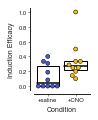

In [9]:
fig = plt.figure(figsize=(1, 1.5))
ax = fig.add_subplot(111)

ind_rate = ind_rate.loc[ind_rate['expt'] != 22417]

sns.boxplot(x='condition', y='pct_success', data=ind_rate,
            ax=ax, order=['Dense', '+Dreadd'],
            whis=False, showcaps=False, showfliers=False)
plt.setp(ax.artists, edgecolor='k', facecolor='w', linewidth=1)
plt.setp(ax.lines, color='k')

sns.swarmplot(x='condition', y='pct_success', hue='condition', data=ind_rate, palette=colors,
              order=['Dense', '+Dreadd'], hue_order=['Dense', '+Dreadd'], ax=ax, size=4,
              edgecolor='k', linewidth=0.5, alpha=1)

ax.get_legend().remove()

clean(ax, offset=4)
ax.set_ylabel('Induction Efficacy')
ax.set_xlabel('Condition')
ax.set_xticklabels(['+saline', '+CNO'])
ax.set_ylim([-0.05, 1.05])

# fig.savefig(savedir + 'efficacy_dense.svg')

control_df = ind_rate.loc[ind_rate['condition'] == 'Dense'].dropna()
cno_df = ind_rate.loc[ind_rate['condition'] == '+Dreadd'].dropna()

print control_df['pct_success'].mean(), control_df['pct_success'].sem()
print cno_df['pct_success'].mean(), cno_df['pct_success'].sem()
print ttest_ind(control_df['pct_success'], cno_df['pct_success'])
print mannwhitneyu(control_df['pct_success'], cno_df['pct_success'])

In [68]:
ind_rate['delta'] = ind_rate['pct_success'] - ind_rate['pct_success_control']

0.0239542930117 0.044258467180296794
0.224048633042 0.09021993033059363
Ttest_1sampResult(statistic=0.5412363901841718, pvalue=0.6014827173385908)
Ttest_1sampResult(statistic=2.4833607410374996, pvalue=0.03479902790967181)


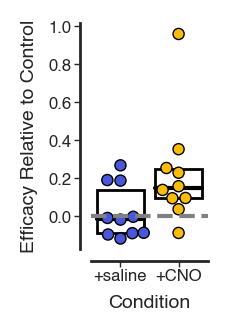

In [76]:
fig = plt.figure(figsize=(0.75, 1.5), dpi=200)
ax = fig.add_subplot(111)

sns.boxplot(x='condition', y='delta', data=ind_rate,
            ax=ax, order=['Dense', '+Dreadd'],
            whis=False, showcaps=False, showfliers=False)
plt.setp(ax.artists, edgecolor='k', facecolor='w', linewidth=1)
plt.setp(ax.lines, color='k')

sns.swarmplot(x='condition', y='delta', hue='condition', data=ind_rate, palette=colors,
              order=['Dense', '+Dreadd'], hue_order=['Dense', '+Dreadd'], ax=ax, size=4,
              edgecolor='k', linewidth=0.5, alpha=1)

ax.get_legend().remove()

clean(ax, offset=4)
ax.set_ylabel('Efficacy Relative to Control')
ax.set_xlabel('Condition')
ax.set_xticklabels(['+saline', '+CNO'])

ax.axhline(0, color='0.5', ls='--', zorder=100)



fig.savefig('/home/sebi/plots/ind/figs3/' + 'efficacy_delta_dense.svg')
control_df = ind_rate.loc[ind_rate['condition'] == 'Dense'].dropna()
cno_df = ind_rate.loc[ind_rate['condition'] == '+Dreadd'].dropna()

print control_df['delta'].mean(), control_df['delta'].sem()
print cno_df['delta'].mean(), cno_df['delta'].sem()
print ttest_1samp(control_df['delta'], 0)
print ttest_1samp(cno_df['delta'], 0)

In [27]:
def tuning_difference(grp, bgrp, roi_filter=None, by_mouse=False,
                       normalize=False):

    """Return mean difference of tuning curves.
    """

    all_diffs = []
    mean_diffs = []
    
    fulldata = grp.data(roi_filter=None)
    data = grp.data(roi_filter=roi_filter)
    
    bfulldata = bgrp.data(roi_filter=None)
    bdata = bgrp.data(roi_filter=roi_filter)

    for expt, bexpt in zip(grp, bgrp):

        stim_loc = expt._get_stim_positions(units='normalized')[0]
        shift = 50 - int(stim_loc)

        if normalize:

            mean2 = np.nanmean(fulldata[expt], axis=0, keepdims=True)
            mean1 = np.nanmean(bfulldata[bexpt], axis=0, keepdims=True)

            mean_diff = mean2 - mean1
            diffs = data[expt] - bdata[bexpt] - mean_diff

        else:
            diffs = data[expt] - bdata[bexpt]

        diffs = np.roll(diffs, shift, axis=1)

        # Convert from frames to seconds
        diffs = diffs / expt.frame_period()

        if by_mouse:
            all_diffs.append(np.nanmean(diffs, axis=0))
        else:
            all_diffs.extend(diffs)
        
        if normalize:
            mean_diffs.extend(np.roll(mean_diff, shift, axis=1) / expt.frame_period())
            
    if normalize:
        return all_diffs, mean_diffs
    else:
        return all_diffs, None

In [28]:
dense_grp = grps[0]
dense_bgrp = pcExperimentGroup([x._get_session('control_baseline') for x in dense_grp], **dense_grp.args)

cno_grp = grps[1]
cno_bgrp = pcExperimentGroup([x._get_session('cno_baseline') for x in cno_grp], **cno_grp.args)

In [109]:
dense_diffs, dense_means = tuning_difference(dense_grp, dense_bgrp, roi_filter=stim_filters[0], normalize=False, by_mouse=True)
cno_diffs, cno_means = tuning_difference(cno_grp, cno_bgrp, roi_filter=stim_filters[1], normalize=False, by_mouse=True)

In [108]:
control_dense_diffs, _ = tuning_difference(dense_grp, dense_bgrp, roi_filter=nostim_filters[0], normalize=False, by_mouse=True)
control_cno_diffs, _ = tuning_difference(cno_grp, cno_bgrp, roi_filter=nostim_filters[1], normalize=False, by_mouse=True)

Text(0.5,1,'POST - PRE')

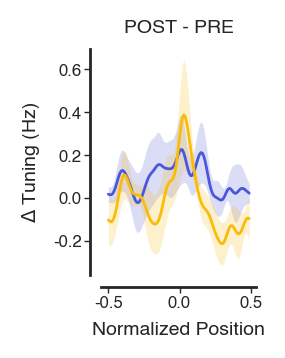

In [114]:
fig = plt.figure(figsize=(1, 1.5), dpi=200)
ax = fig.add_subplot(111)

bin_to_cm = grp[0].track_length / 1000.

# dense_mean = np.nanmean(dense_diffs, axis=0)
# dense_mean = dense_mean - np.nanmean(control_dense_diffs, axis=0)
# dense_sem = sem(dense_diffs, axis=0)

dense_diffs = np.array(dense_diffs) - np.array(control_dense_diffs)
dense_mean = np.nanmean(dense_diffs, axis=0)
dense_sem = sem(dense_diffs, axis=0)

# cno_mean = np.nanmean(cno_diffs, axis=0)
# dense_mean = dense_mean - np.nanmean(control_cno_diffs, axis=0)
# cno_sem = sem(cno_diffs, axis=0)

cno_diffs = np.array(cno_diffs) - np.array(control_cno_diffs)
cno_mean = np.nanmean(cno_diffs, axis=0)
cno_sem = sem(cno_diffs, axis=0)

x = np.arange(-50, 50) / 100.

# ax.axvline(0, color='k', ls='--')

ax.plot(x, dense_mean, color=colors[0], lw=1)
ax.fill_between(x, dense_mean-dense_sem, dense_mean+dense_sem, color=colors[0], alpha=0.2, lw=0)
ax.plot(x, cno_mean, color=colors[1], lw=1)
ax.fill_between(x, cno_mean-cno_sem, cno_mean+cno_sem, color=colors[1], alpha=0.2, lw=0)

clean(ax, offset=4)
ax.set_xlabel('Normalized Position')
ax.set_ylabel('$\Delta$ Tuning (Hz)')
ax.set_title('POST - PRE')

# fig.savefig(savedir + 'cno_tuning_difference.svg', bbox_inches='tight')

## Data Functions

In [37]:
savedir = '/home/sebi/plots/ind/fig3/'
datadir = '/home/sebi/data/induction/fig3/'

In [5]:
def activity_centroid_vs_nstimmed(grps, stim_filters, labels=None, n_stimmed=True):

    if labels is None:
        labels = [x.label() for x in grps]

    dfs = []
    for grp, stim_filter, label in zip(grps, stim_filters, labels):
        df = ia.activity_centroid_distance(grp, roi_filter=stim_filter, stim_session=grp[0].stim_session)
        grouped_df = df.groupby(['mouse_name', 'expt_id']).mean()
        if n_stimmed:
            count_df = df.groupby(['mouse_name', 'expt_id']).count()
            grouped_df['count'] = count_df['abs_dist']
        else:
            stim_df = ia.success_rate(grp, stim_filter, stim_filter)
            grouped_df = grouped_df.merge(stim_df, left_on=['mouse_name', 'expt_id'],
                                          right_on=['mouse', 'expt'])
            grouped_df['count'] = grouped_df['pct_stimmed'] * 100
        grouped_df['group'] = label
#         corr = pearsonr(grouped_df['abs_dist'], grouped_df['count'])
#         print 'Activity Centroid V N Stimmed: r={}, p={}'.format(corr[0], corr[1])
#         corr = spearmanr(grouped_df['abs_dist'], grouped_df['count'])
#         print 'Activity Centroid V N Stimmed: spearman r={}, p={}'.format(corr[0], corr[1])
        dfs.append(grouped_df)

    df = pd.concat(dfs)
    
    return df

In [9]:
def activity_centroid_shift_paired(grps, stim_filters,
                            sessions=['baseline', 'induction'],
                            labels=['Dense', '+Dreadd'], colors=None):

    df = pd.DataFrame([])

    for grp, stim_filter, label in zip(grps, stim_filters, labels):
        condition = grp[0].session.split('_')[0]
        for session in sessions:

            sess_grp = [x._get_session(condition + '_' + session) for x in grp]
            sess_grp = pcExperimentGroup(sess_grp, **grp.args)

            stim_session = condition + '_induction'

            sess_df = ia.activity_centroid_distance(sess_grp, roi_filter=stim_filter, stim_session=stim_session)
            sess_df['condition'] = label
            sess_df['session'] = session

            df = pd.concat([df, sess_df])

    shift_df = df.loc[(df['session'] == 'induction')].merge(
        df.loc[(df['session'] == 'baseline')],
        on=['roi', 'mouse_name', 'condition'],
        suffixes=['_ind', '_base'])

    shift_df['shift'] = shift_df.apply(lambda x: x['abs_dist_base'] - x['abs_dist_ind'], axis=1)

    grp_df = shift_df.groupby(['mouse_name', 'condition', 'expt_id_ind'], as_index=False).mean()
    
    return grp_df

In [23]:
def success_rate_paired(grps, stim_filters, ind_filters, nostim_filters, nostim_ind_filters,
                        labels=['Dense', '+Dreadd']):

    dfs = []
    for grp, label, a, b, c, d in zip(grps, labels, stim_filters, ind_filters, nostim_filters, nostim_ind_filters):

        ind_rate = ia.induction_rate(grp, a, b, c, d)
        ind_rate['condition'] = label

        dfs.append(ind_rate)

    df = pd.concat(dfs)
    
    return df

In [8]:
activity_centroid_df = activity_centroid_vs_nstimmed(grps, stim_filters)
activity_centroid_df.to_pickle(savedir + 'activity_centroid_dense.pkl')

In [20]:
shift_df = activity_centroid_shift_paired(grps, stim_filters)
shift_df.to_pickle(savedir + 'shift_dense.pkl')

In [29]:
ind_rate = success_rate_paired(grps, stim_filters, ind_filters, nostim_filters, nostim_ind_filters)
ind_rate.to_pickle(savedir + 'success_dense.pkl')

In [8]:
ind_rate = pd.read_pickle(datadir + 'success_dense.pkl')
activity_centroid_df = pd.read_pickle(datadir + 'activity_centroid_dense.pkl')
shift_df = pd.read_pickle(datadir + 'shift_dense.pkl')

In [12]:
ind_rate.loc[(ind_rate['condition'] == 'Dense') & (ind_rate['n_stimmed'] > 1)]['n_stimmed'].median()

11.5

In [12]:
stim_td = ia.tuning_difference(grps[0], roi_filter=stim_filters[0], by_mouse=False)
cno_stim_td = ia.tuning_difference(grps[1], roi_filter=stim_filters[1], by_mouse=False,
                                  session1='cno_baseline', session2='cno_induction')